# Part 1: Analyze and Explore the Climate Data

In [92]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [95]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [96]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [97]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [98]:
# Save references to each table

# Assign the demographics class to a variable called `Measurement` and station
Measurement = Base.classes.measurement

Station = Base.classes.station

In [99]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [100]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f80b4f59960>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [101]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f80b4f59c00>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [102]:
import datetime as dt

In [103]:
# Find the most recent date in the data set.
Most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Most_recent_date

('2017-08-23',)

### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [104]:
# Starting from the most recent data point in the database. 
Most_recent_datetime=dt.datetime(2017, 8, 23)
Most_recent_datetime

datetime.datetime(2017, 8, 23, 0, 0)

In [105]:
# Calculate the date one year from the last date in data set.
Tweleve_months_ago = Most_recent_datetime - dt.timedelta(days=365)
Tweleve_months_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [106]:
# Perform a query to retrieve the data and precipitation scores

Pcp=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Tweleve_months_ago).all()

Pcp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [107]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(Pcp, columns=['Date', 'Precipitation'])
df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [108]:
# Sort the dataframe by date
df.sort_values("Date")
df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


<Axes: title={'center': 'Total Precipitation per Day'}, xlabel='Date'>

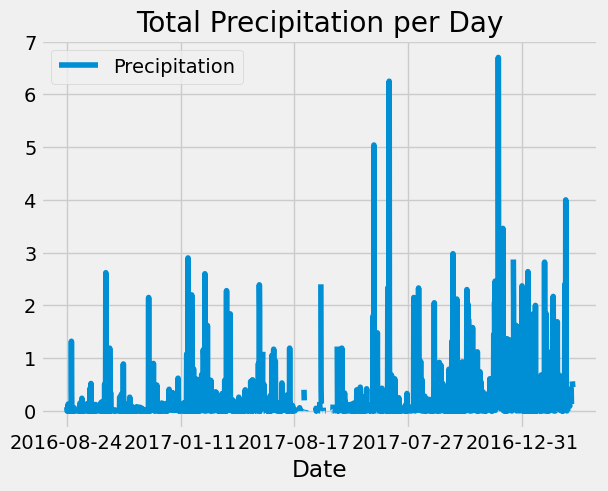

In [109]:
# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
df.plot(title = 'Total Precipitation per Day' )
#df.plot.bar()
#plt.tight_layout()
#plt.show()

In [110]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [112]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

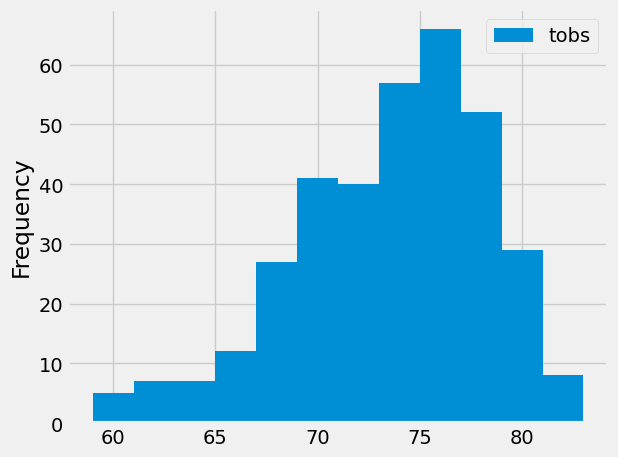

In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= Tweleve_months_ago).all()

df = pd.DataFrame(results, columns = ['tobs'])

df.plot.hist(bins = 12)
plt.tight_layout()

# Close Session

In [115]:
# Close Session
session.close()

# Part 2: Design Climate App

In [116]:
# Import the dependencies.

import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

#################################################
# Database Setup
#################################################

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


# Create our session (link) from Python to the DB
session = Session(engine)

In [117]:
#################################################
# Flask Setup
#################################################

app = Flask(__name__)

In [118]:
#################################################
# Flask Routes
#################################################

@app.route('/')
def home_route():
    """ Available API Route Endpoints"""
    return (f"Enter Available Route Endpoints.  Where dates are required, modify date selection as desired: <br><br/>"
        f"1.   2017 dates & temps dictionary:   <br/>"
        f"   /api/v1.0/precipitation/ <br><br/>" 
        f"2.   JSON list of stations:    <br/>"
        f" /api/v1.0/stations/ <br><br/>" 
        f"3.    2017 JSON list of Temp Observations:  <br/>"
        f" /api/v1.0/tobs/ <br><br/>"
        f"For the following, enter date as form 'yyyy' or 'yyyy-mm' or 'yyyy-mm-dd' for BEST RESULTS! <br><br/>"
        f"4.    Stats Combined Stations. Enter Start date:  <br/>"
        f" /api/v1.0/2016-01-01/ <br><br/>" 
        f"5.    Stats Combined Stations. Enter Start & End Date:  <br/>"
        f" /api/v1.0/2016-01-01/2016-12-31/ <br><br/>"
        f"BONUS Options for the interested! <br><br/>"
        f"6.    Stats by Station,  Enter Start date:    <br/>"
        f"  /api/v1.0/station/2017-01-01/ <br><br/>" 
        f"7.    Stats by Station,  Enter Start & End date:   <br/>"
        f"   /api/v1.0/station/2016-01-01/2016-12-31/ <end>")
        
#-----------------------------------------------------------------------------------------------#
#    Query Measurements for... All Stations
#    Dates and temperature observations from the last year.
#    Convert the query results to a Dictionary using 'date' as the key and 'tobs' as the value.
#    Return the JSON representation of your dictionary
#-----------------------------------------------------------------------------------------------#

@app.route('/api/v1.0/precipitation/')
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= '2017-01-01').all()
    p_dict = dict(prcp_results)
    print()
    print("Results for Precipitation")
    return jsonify(p_dict) 

#------------------------------------------------------------------------------------------------#
#    Query Stations for.... Stations
#    Return a JSON-list of stations from the dataset.
#------------------------------------------------------------------------------------------------#

@app.route('/api/v1.0/stations/')
def stations():
    station_list = session.query(Station.station)\
    .order_by(Station.station).all() 
    print()
    print("Station List:")   
    for row in station_list:
        print (row[0])
    return jsonify(station_list)

#------------------------------------------------------------------------------------------------#
#    Query Measurement for.... All stations
#    Return a JSON-list of Temperature Observations from the dataset.
#------------------------------------------------------------------------------------------------#

@app.route('/api/v1.0/tobs/')
def tobs():
    temp_obs = session.query(Measurement.tobs)\
    .order_by(Measurement.date).all()
    print()
    print("Temperature Results for All Stations")
    return jsonify(temp_obs)

#------------------------------------------------------------------------------------------------#
# Query Measurements for.... Combined Stations
# Return a JSON-list of Temperature Observations from the previous year.
#   /api/v1.0/<start  and /api/v1.0/<start>/<end>
#   Return JSON list of temps: minimum, average, maxium as TMIN TAVG TMAX
#       FOR A GIVEN START DATE OR START END RANGE
#------------------------------------------------------------------------------------------------#

@app.route('/api/v1.0/<start>/')
def combined_start_stats(start):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date >= start).all()                  
    print()
    print("Query Temps Combinded Stations with Start ({start}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

#------------------------------------------------------------------------------------------------#
# Query Measurements for.... Combined Stations
# Repeat of above stat request, but with end date added to decorator
#------------------------------------------------------------------------------------------------#

@app.route('/api/v1.0/<start>/<end>/')
def combined_start_end_stats(start,end):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date <= end)\
                  .filter(Measurement.date >= start).all()
    print()
    print(f"Query Temps Combined Stations with Start ({start}) and End ({end}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)



In [119]:
if __name__ == '__main__':
    app.run(debug=True, port=9000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:9000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Users/shelly/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/shelly/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/shelly/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/shelly/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/Users/shelly/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/Users/shelly/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 665, in initialize
    self.init_sockets()
  File "/Users/shelly/anaconda3/lib/python3.10/site-packages/ipyk

SystemExit: 1

/Users/shelly/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
